In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r'/Users/andresfiguerola/Downloads/data.csv')

/Users/andresfiguerola/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.columns

Index(['Unnamed: 0', 'id', 'date', 'time', 'gender', 'age', 'natlangs',
       'primelangs', 'dyslexia', 'psychiatric',
       ...
       'q34_6', 'q34_8', 'q35_1', 'q35_2', 'q35_4', 'q35_5', 'q35_7', 'q35_8',
       'correct', 'elogit'],
      dtype='object', length=128)

The columns that start with q correspond to question numbers

In [5]:
questions_filter = [col for col in df if col.startswith('q')]
df_questions=df[questions_filter]
len(df_questions.columns)

95

In [6]:
df_noQuestions=df.drop(df_questions.columns, axis=1)
df_noQuestions.head()

,Unnamed: 0,id,date,time,gender,age,natlangs,primelangs,dyslexia,psychiatric,...,Ir_region,UK_constituency,nat_Eng,prime_Eng,speaker_cat,type,Lived_Eng_per,Eng_little,correct,elogit
0,1,2.0,2014-05-29,01:00:55,male,31,English,English,0,0,...,NaN,NaN,1,1,native,United States,NaN,monoeng,0.978947,3.621671
1,2,3.0,2014-05-29,01:01:03,male,30,English,English,0,1,...,NaN,HP,1,1,native,NaN,NaN,monoeng,1.000000,5.252273
2,3,3.0,2014-05-29,01:01:03,male,30,English,English,0,1,...,NaN,HP,1,1,native,NaN,NaN,monoeng,1.000000,5.252273
3,4,4.0,2014-05-29,01:01:13,male,19,English,English,0,0,...,NaN,NaN,1,1,native,Ebonics,NaN,monoeng,0.905263,2.208853
4,5,5.0,2014-05-29,01:01:19,male,20,"Chinese/Mandarin, English","Chinese/Mandarin, English",0,0,...,NaN,NaN,1,1,native,NaN,NaN,bileng,0.947368,2.800602


Number of Patients wiouth psychiatric disorder

In [7]:
len(df.psychiatric[df.psychiatric==0])

648923

Number of Patients with psychiatric disorders

In [8]:
df.psychiatric[df.psychiatric==1].sum()

20575

Education  column Cleaning

In [10]:


ed_list=['Graduate Degree','Undergraduate Degree (3-5 years higher ed)','Some Undergrad (higher ed)','High School Degree (12-13 years)',
 'Some Graduate School',"Didn't Finish High School (less than 13 years ed)", "Haven't Finished High School (less than 13 years ed)"]
df_ed=df[df.education.isin(ed_list)]

df_ed.loc[df_ed['education']=='Some Undergrad (higher ed)','education' ] = 'High School Degree (12-13 years)'
df_ed.loc[df_ed['education']=="Haven't Finished High School (less than 13 years ed)",'education'] = "Didn't Finish High School (less than 13 years ed)"
df_ed.loc[df_ed['education']=='Some Graduate School','education'] = 'Undergraduate Degree (3-5 years higher ed)'
df_ed.loc[df_ed['education']=='Undergraduate Degree (3-5 years higher ed)','education'] = 'Undergraduate Degree'
df_ed.loc[df_ed['education']=="Didn't Finish High School (less than 13 years ed)",'education'] = "Didn't Finish High School"
df_ed.loc[df_ed['education']=='High School Degree (12-13 years)','education' ] = 'High School Degree'
print(df_ed.education.unique())


/Users/andresfiguerola/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['Graduate Degree' 'Undergraduate Degree' 'High School Degree'
 "Didn't Finish High School"]


In [13]:
df_US=df_noQuestions[~df_noQuestions.US_region.isna()]
df_US=df_US[~df_US.US_region.isin(['none','nan'])]
df_US['education']=df_ed['education']
df_US.head()

,Unnamed: 0,id,date,time,gender,age,natlangs,primelangs,dyslexia,psychiatric,...,Ir_region,UK_constituency,nat_Eng,prime_Eng,speaker_cat,type,Lived_Eng_per,Eng_little,correct,elogit
3,4,4.0,2014-05-29,01:01:13,male,19,English,English,0,0,...,NaN,NaN,1,1,native,Ebonics,NaN,monoeng,0.905263,2.208853
5,6,6.0,2014-05-29,01:01:20,female,58,English,English,0,0,...,NaN,NaN,1,1,native,United States,NaN,monoeng,0.957895,3.012262
6,7,6.0,2014-05-29,01:01:20,female,58,English,English,0,0,...,NaN,NaN,1,1,native,United States,NaN,monoeng,0.989474,4.143135
7,8,7.0,2014-05-29,01:01:22,female,22,English,English,0,0,...,NaN,NaN,1,1,native,United States,NaN,monoeng,0.978947,3.621671
8,9,9.0,2014-05-29,01:02:09,male,53,Tagalog,English,0,0,...,NaN,NaN,0,0,native,NaN,1.0,NaN,0.947368,2.800602


FIRST SUGGESTIVE PLOT. The threshold of correctness on individuals with psychiatric disorders appears higher that that of those without a disorder. This appears to be independent of the level of education and tears in English speaking country as we shall see in the next plot.

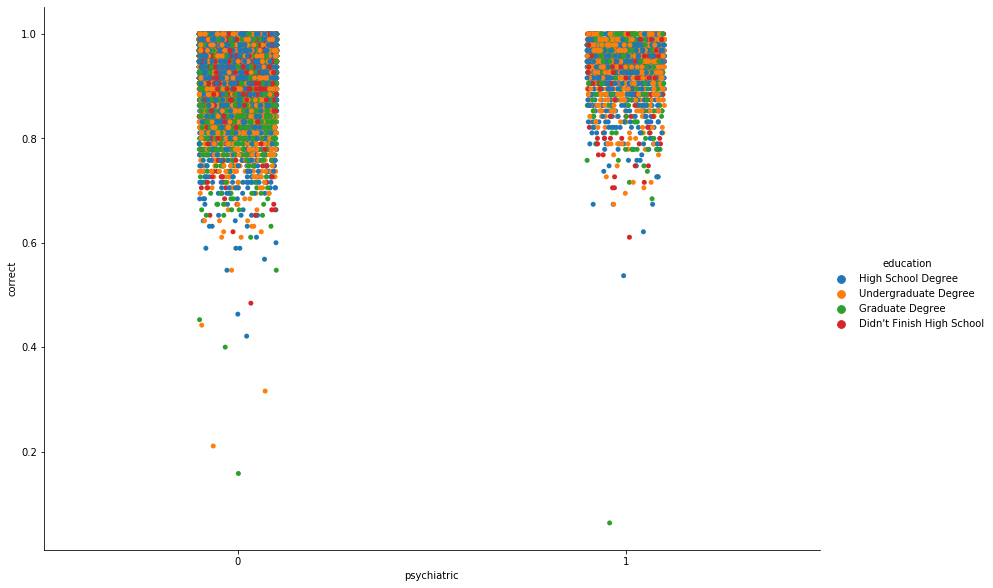

In [14]:
sns.catplot(x="psychiatric", y="correct",hue="education", data=df_US,height=8.27, aspect=11.7/8.27);

SECOND SUGGESTIVE PLOT. The individuals with psychiatric disorders seem similarly distributed among the categories of education and years spent living on English speaking countries.

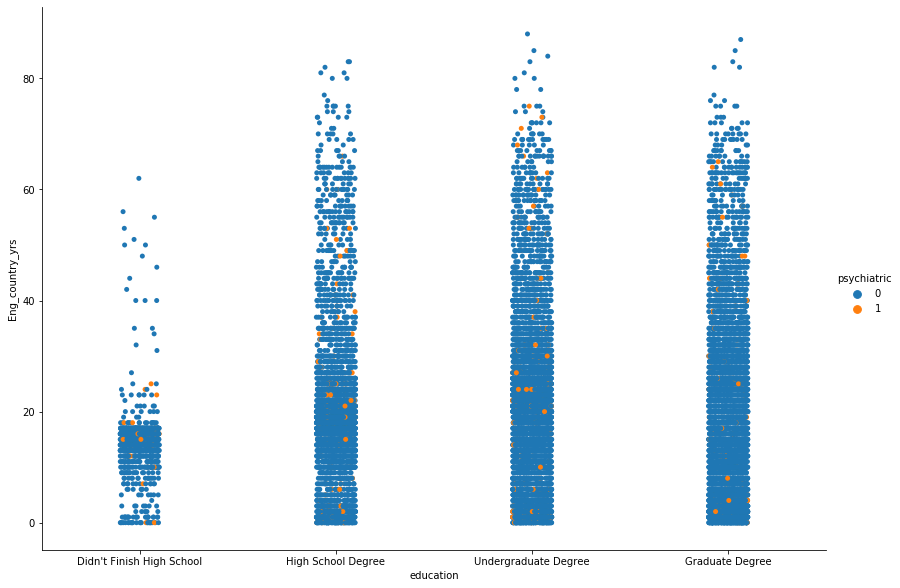

In [17]:
sns.catplot(x="education", y="Eng_country_yrs",hue="psychiatric", order=["Didn't Finish High School", "High School Degree"
                                                                        ,'Undergraduate Degree', "Graduate Degree"],data=df_US,height=8.27, aspect=11.7/8.27);